In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import requests

In [2]:
def download_file(url, local_filename):
    # Check if the file already exists
    if os.path.exists(local_filename):
        print(f"File {local_filename} already exists. No download needed.")
        return

    # Send a GET request to the URL
    with requests.get(url, stream=True) as r:
        r.raise_for_status()  # Check for request errors
        with open(local_filename, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192): 
                f.write(chunk)  # Write the content to the file in chunks
    print(f"File {local_filename} downloaded successfully.")

In [3]:
url = 'http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz'
local_filename = 'data/kddcup.data_10_percent.gz'
download_file(url, local_filename)

url = 'http://kdd.ics.uci.edu/databases/kddcup99/kddcup.names'
local_filename = 'data/kddcup.names'
download_file(url, local_filename)

url = 'http://kdd.ics.uci.edu/databases/kddcup99/training_attack_types'
local_filename = 'data/training_attack_types'
download_file(url, local_filename)

File data/kddcup.data_10_percent.gz already exists. No download needed.
File data/kddcup.names already exists. No download needed.
File data/training_attack_types already exists. No download needed.


In [4]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
#print(columns)
print(len(columns))

42


In [5]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

In [6]:
path = "./data/kddcup.data_10_percent.gz"
df = pd.read_csv(path,names=columns)

#Adding Attack Type column
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])

df.tail().style

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
494016,0,tcp,http,SF,310,1881,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,5,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.400000,86,255,1.000000,0.000000,0.010000,0.050000,0.000000,0.010000,0.000000,0.000000,normal.,normal
494017,0,tcp,http,SF,282,2286,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,6,255,1.000000,0.000000,0.170000,0.050000,0.000000,0.010000,0.000000,0.000000,normal.,normal
494018,0,tcp,http,SF,203,1200,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,18,0.170000,0.110000,0.000000,0.000000,1.000000,0.000000,0.170000,16,255,1.000000,0.000000,0.060000,0.050000,0.060000,0.010000,0.000000,0.000000,normal.,normal
494019,0,tcp,http,SF,291,1200,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,12,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.170000,26,255,1.000000,0.000000,0.040000,0.050000,0.040000,0.010000,0.000000,0.000000,normal.,normal
494020,0,tcp,http,SF,219,1234,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,35,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.140000,6,255,1.000000,0.000000,0.170000,0.050000,0.000000,0.010000,0.000000,0.000000,normal.,normal


In [7]:
filtered_df = df[df['Attack Type'] != 'normal']

filtered_df.tail()

filtered_df.shape

(396743, 43)

In [8]:
df.shape


df['target'].value_counts()



smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: target, dtype: int64

In [9]:
df['Attack Type'].value_counts()

dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: Attack Type, dtype: int64

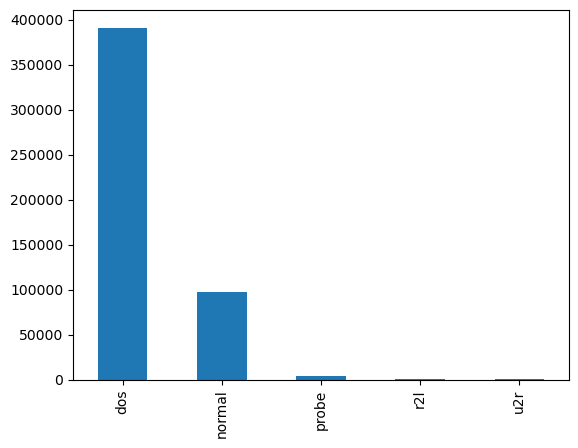

In [10]:
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")
bar_graph('Attack Type')

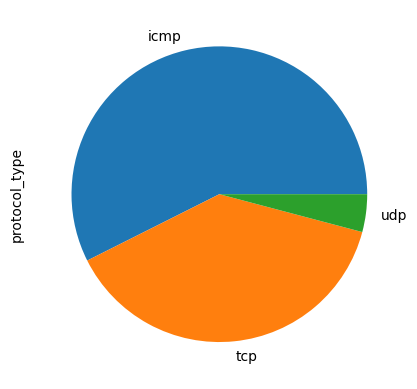

In [11]:
def pie_graph(feature):
    df[feature].value_counts().plot(kind="pie")
pie_graph('protocol_type')

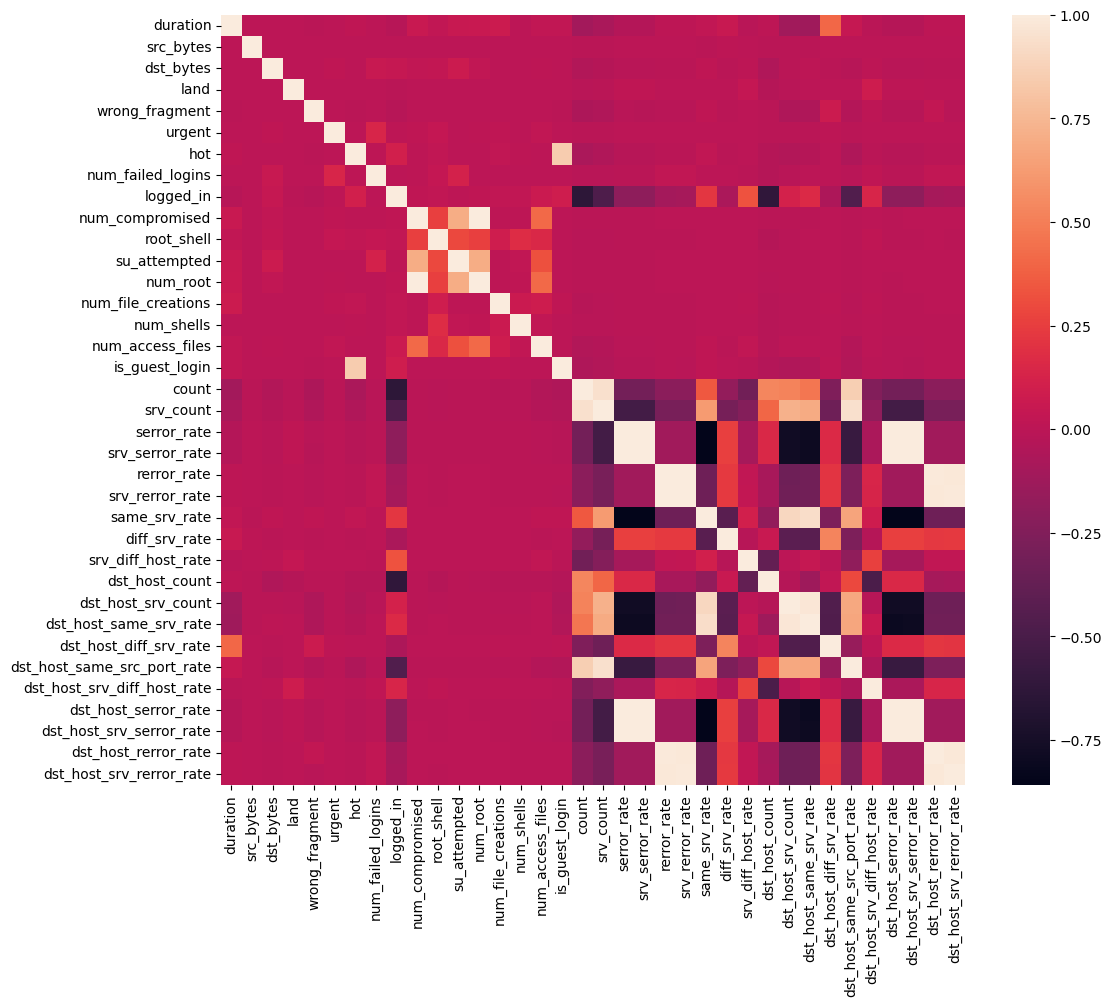

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,181,5450,0,0,0,0,0,1,0,...,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0
1,0,239,486,0,0,0,0,0,1,0,...,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0
2,0,235,1337,0,0,0,0,0,1,0,...,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
3,0,219,1337,0,0,0,0,0,1,0,...,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
4,0,217,2032,0,0,0,0,0,1,0,...,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0


In [12]:


df = df.dropna(axis=1)# drop columns with NaN

#df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values

#df_filt = df.loc[:, df.nunique() > 1]

#corr = df_filt.corr()

df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values
numeric_cols = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_cols]

corr = df_numeric.corr()

plt.figure(figsize=(12,10))

sns.heatmap(corr)

plt.show()

df_numeric.head()

In [13]:
print(requests.__version__) 

2.28.1


In [17]:
sampler=np.random.permutation(len(df))
df=df.take(sampler)
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
395597,0,tcp,kshell,S0,0,0,0,0,0,0,...,0.04,0.05,0.0,0.0,1.0,1.0,0.0,0.0,neptune.,dos
117469,0,tcp,private,S0,0,0,0,0,0,0,...,0.03,0.07,0.0,0.0,1.0,1.0,0.0,0.0,neptune.,dos
179797,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.,dos
421060,0,icmp,ecr_i,SF,520,0,0,0,0,0,...,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.,dos
167145,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.,dos


In [18]:
df.to_pickle("./data/IoT_data/kddData.pkl")